# Cancer Dataset EDA
This notebook performs an exploratory data analysis (EDA) on the UAE cancer dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Load the Dataset

In [2]:
cancer_df = pd.read_csv('_cancer_dataset_uae.csv', keep_default_na=False, na_values=['', 'N/A'])

## Initial Exploration

In [3]:
print("Preview of Data:")
print(cancer_df.head())

print("\nDataset Info:")
print(cancer_df.info())

Preview of Data:
  Patient_ID  Age  Gender Nationality        Emirate Diagnosis_Date  \
0  PAT000001   69  Female     Emirati  Umm Al Quwain     2020-11-30   
1  PAT000002   32    Male     Emirati  Umm Al Quwain     2015-10-10   
2  PAT000003   89    Male     Emirati      Abu Dhabi     2018-02-13   
3  PAT000004   78  Female     Emirati      Abu Dhabi     2022-02-04   
4  PAT000005   38  Female     Emirati       Fujairah     2019-12-03   

  Cancer_Type Cancer_Stage Treatment_Type Treatment_Start_Date  \
0       Liver           II      Radiation           2020-12-04   
1    Leukemia          III        Surgery           2015-11-05   
2       Liver          III      Radiation           2018-08-03   
3        Lung          III      Radiation           2022-03-13   
4  Pancreatic           II   Chemotherapy           2020-02-29   

                     Hospital Primary_Physician          Outcome Death_Date  \
0     Sheikh Khalifa Hospital          Dr. VO41        Recovered        NaN   
1

## Summary Statistics

In [4]:
summary_stats = cancer_df.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
                Age        Weight        Height
count  10000.000000  10000.000000  10000.000000
mean      53.539700     69.550000    169.347500
std       20.757324     14.933339     10.070118
min       18.000000     18.000000    131.000000
25%       36.000000     60.000000    163.000000
50%       53.000000     70.000000    169.000000
75%       72.000000     80.000000    176.000000
max       89.000000    122.000000    208.000000


## Missing Values

In [5]:
print("\nMissing Values:")
print(cancer_df.isnull().sum())

# Fill missing Cause_of_Death values with 'Alive'
cancer_df['Cause_of_Death'] = cancer_df['Cause_of_Death'].fillna('Alive')


Missing Values:
Patient_ID                 0
Age                        0
Gender                     0
Nationality                0
Emirate                    0
Diagnosis_Date             0
Cancer_Type                0
Cancer_Stage               0
Treatment_Type             0
Treatment_Start_Date       0
Hospital                   0
Primary_Physician          0
Outcome                    0
Death_Date              9008
Cause_of_Death          9008
Smoking_Status             0
Comorbidities              0
Ethnicity                  0
Weight                     0
Height                     0
dtype: int64


## Data Cleaning

In [6]:
duplicates_count = cancer_df.duplicated().sum()
print(f"\nDuplicates Found: {duplicates_count}")
cancer_df.drop_duplicates(inplace=True)

# Standardize column names
cancer_df.columns = cancer_df.columns.str.lower().str.replace(" ", "_")


Duplicates Found: 0


## Convert Date Columns

In [7]:
date_columns = ['diagnosis_date', 'treatment_start_date', 'death_date']
for col in date_columns:
    cancer_df[col] = pd.to_datetime(cancer_df[col], errors='coerce')

## Categorical Data Visualization

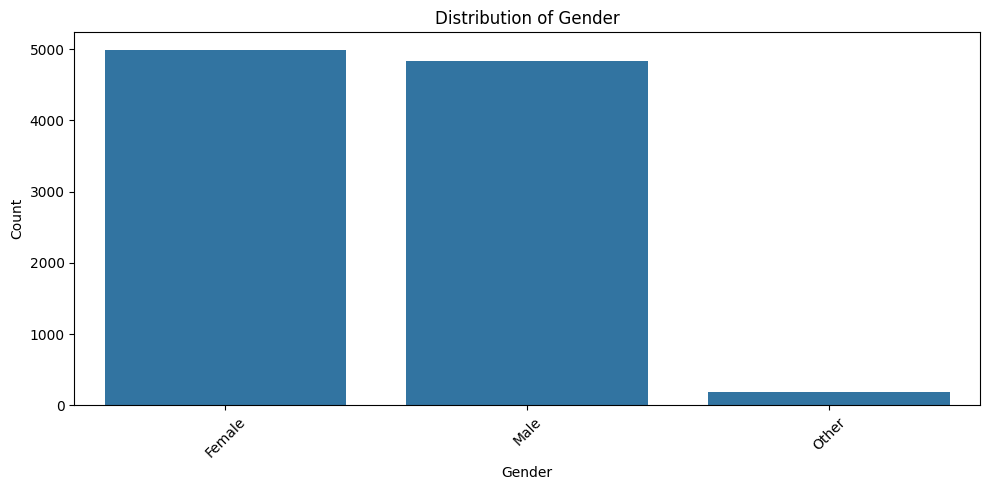

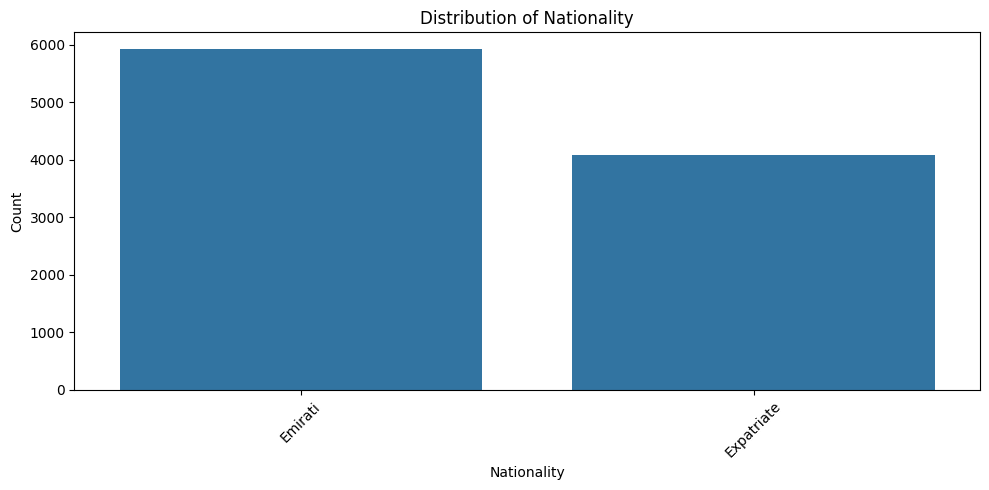

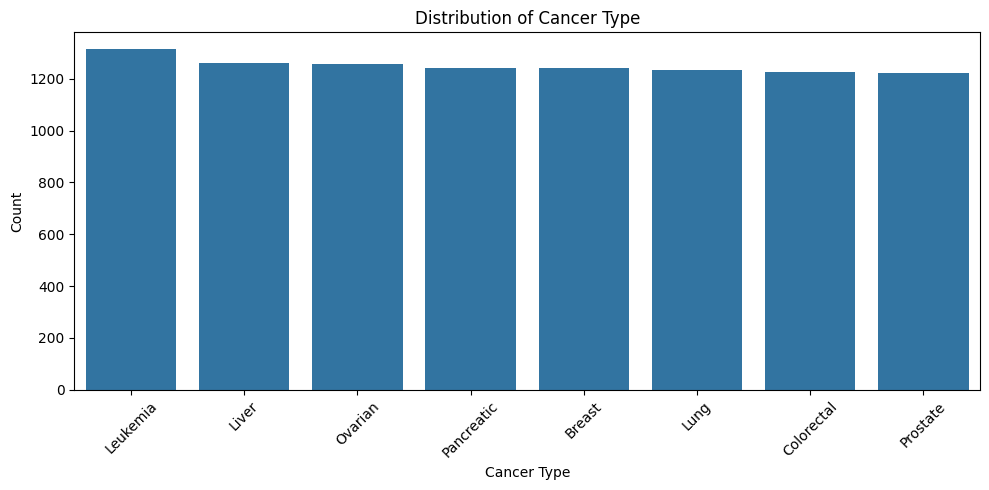

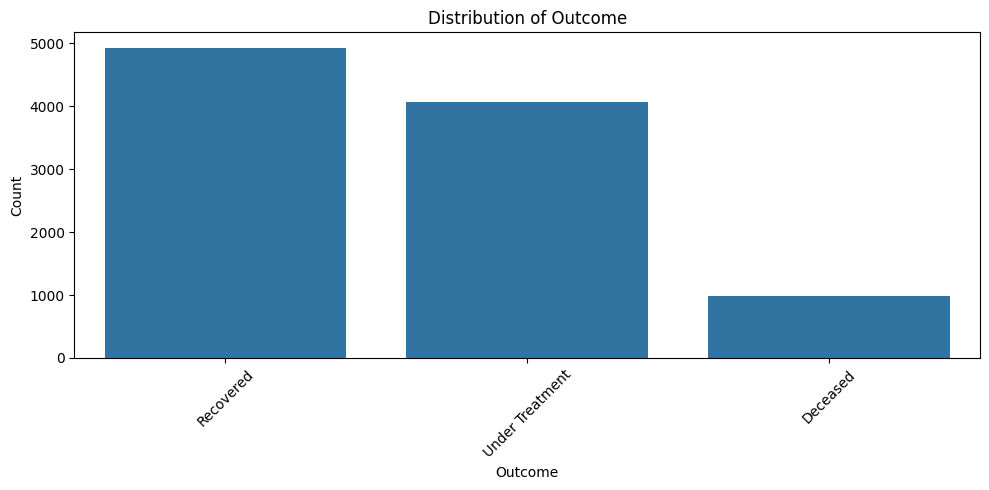

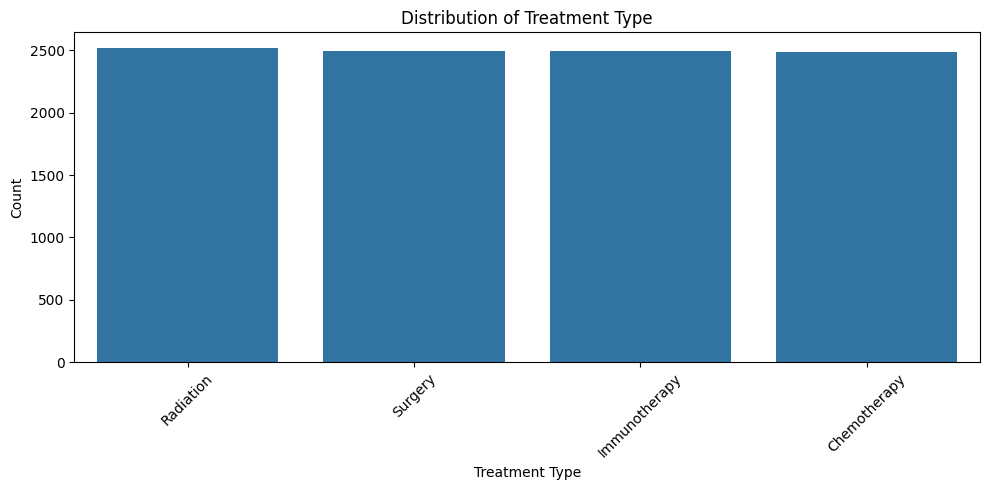

In [8]:
categorical_columns = ['gender', 'nationality', 'cancer_type', 'outcome', 'treatment_type']
for col in categorical_columns:
    if col in cancer_df.columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(data=cancer_df, x=col, order=cancer_df[col].value_counts().index)
        plt.title(f'Distribution of {col.replace("_", " ").title()}')
        plt.xlabel(col.replace("_", " ").title())
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

## Numerical Data Visualization

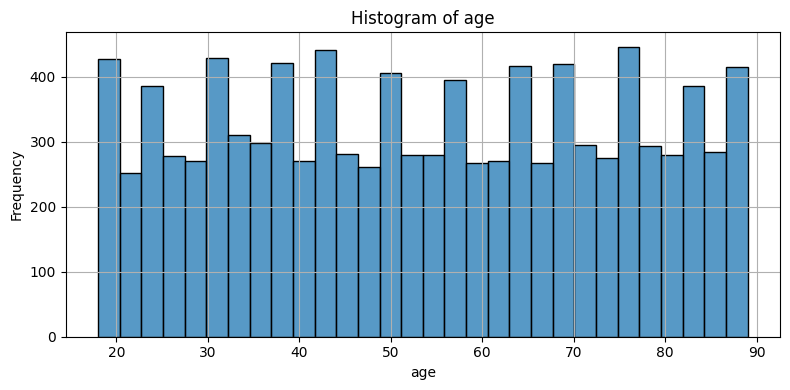

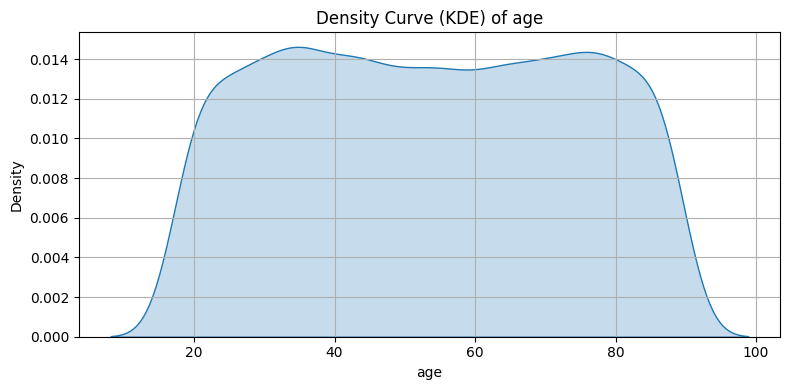

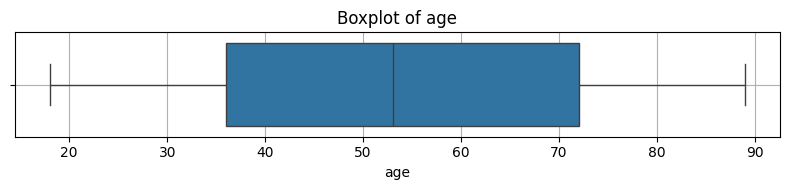

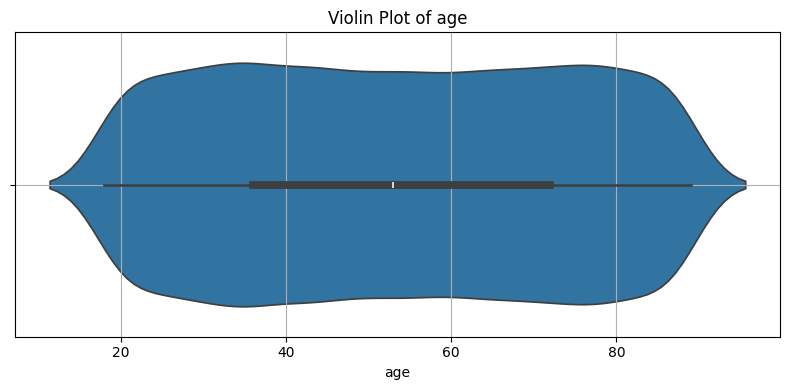

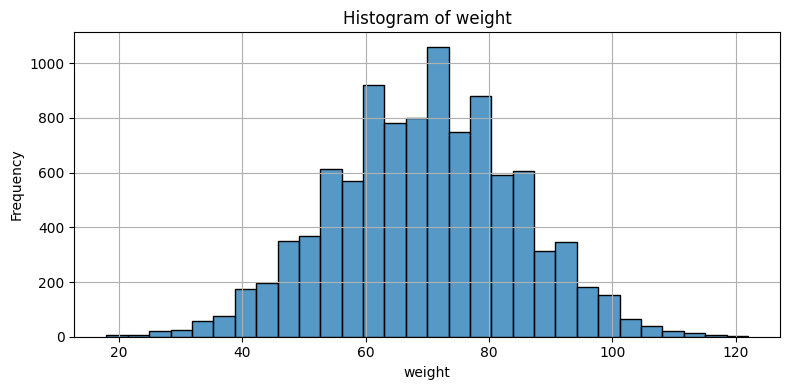

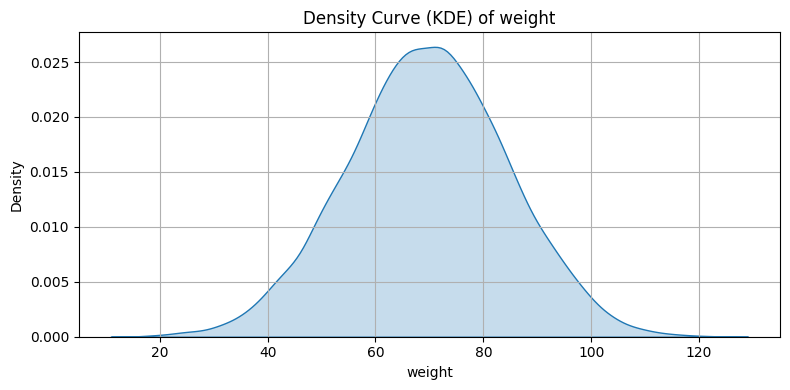

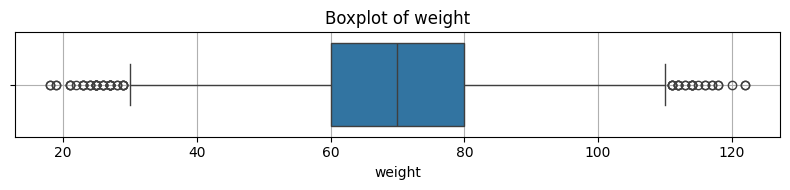

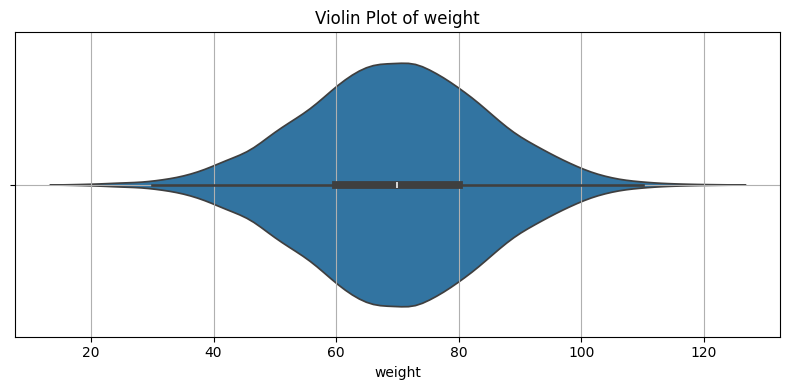

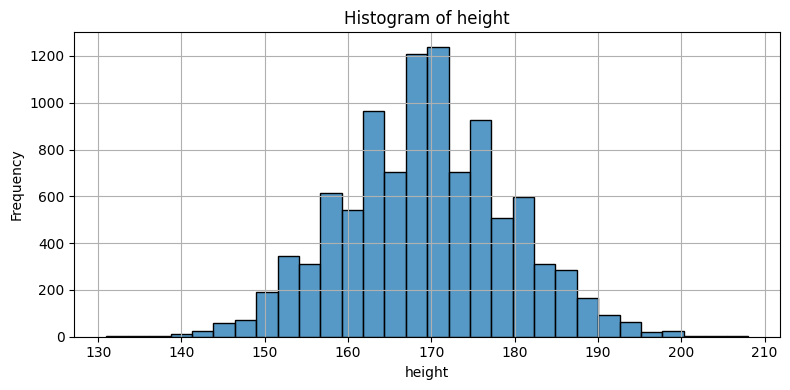

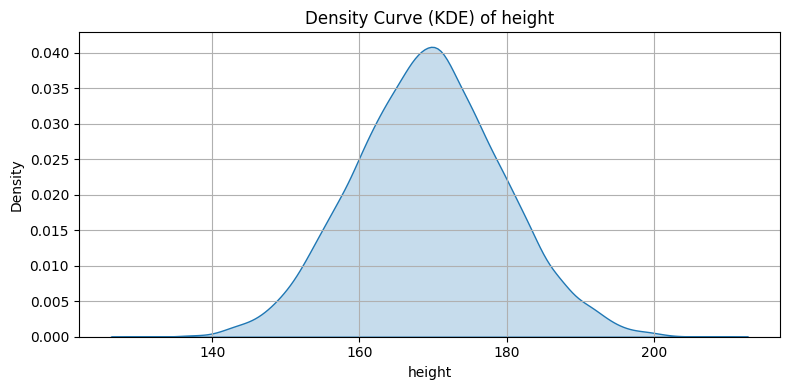

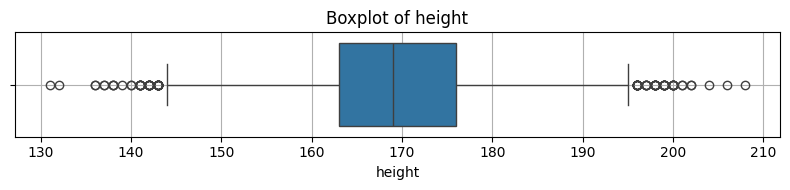

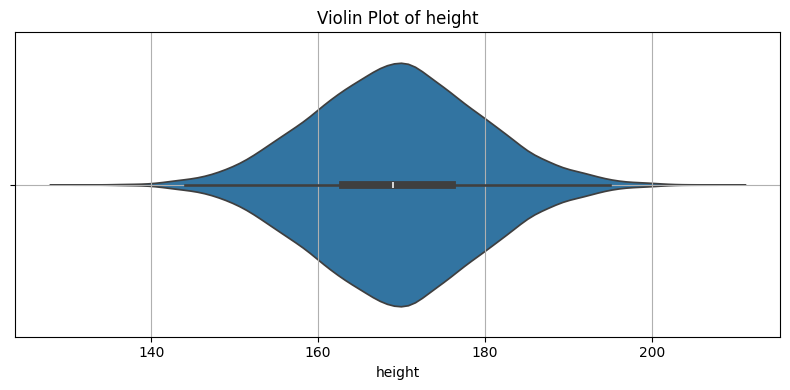

In [9]:
numerical_columns = ['age', 'weight', 'height']
for col in numerical_columns:
    if col in cancer_df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(cancer_df[col], kde=False, bins=30)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(8, 4))
        sns.kdeplot(cancer_df[col].dropna(), fill=True)
        plt.title(f'Density Curve (KDE) of {col}')
        plt.xlabel(col)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(8, 2))
        sns.boxplot(x=cancer_df[col])
        plt.title(f'Boxplot of {col}')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(8, 4))
        sns.violinplot(x=cancer_df[col])
        plt.title(f'Violin Plot of {col}')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

## Age Distribution by Gender

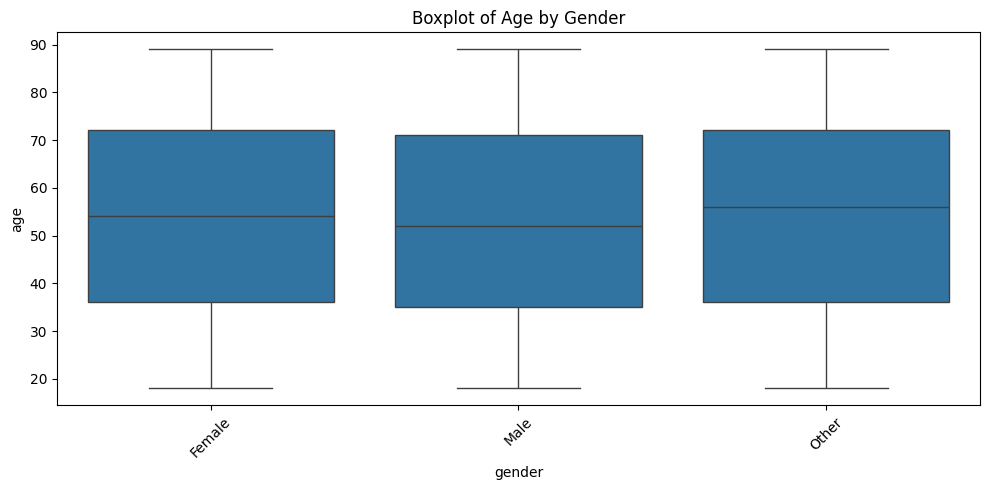

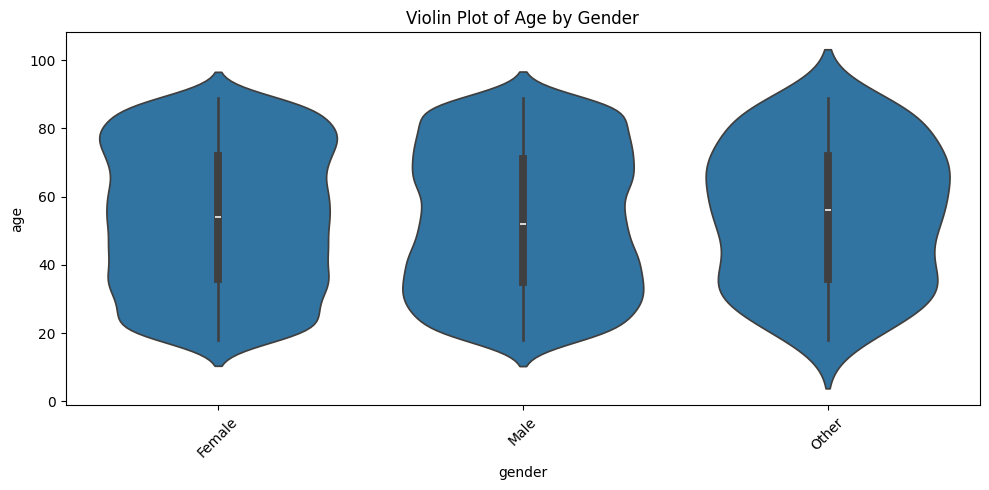

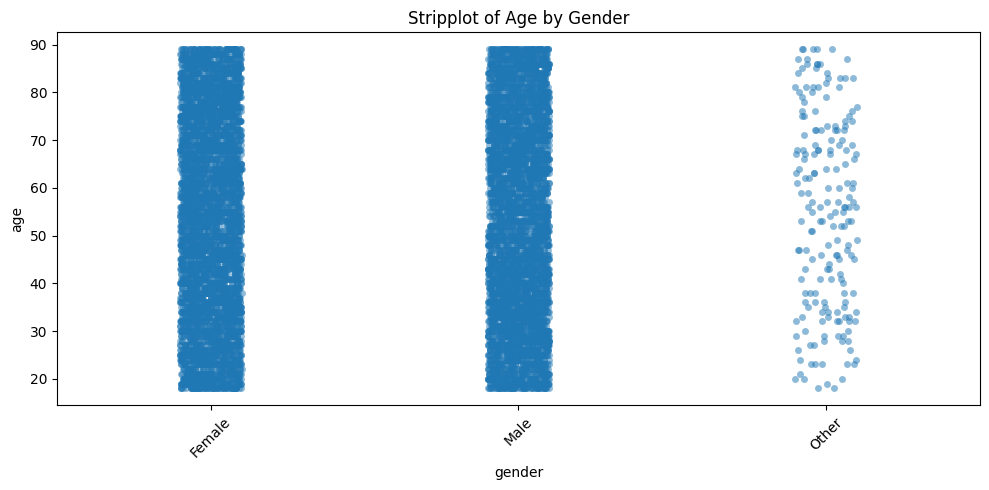

In [10]:
if 'gender' in cancer_df.columns and 'age' in cancer_df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='gender', y='age', data=cancer_df)
    plt.title("Boxplot of Age by Gender")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.violinplot(x='gender', y='age', data=cancer_df)
    plt.title("Violin Plot of Age by Gender")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.stripplot(x='gender', y='age', data=cancer_df, jitter=True, alpha=0.5)
    plt.title("Stripplot of Age by Gender")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Weight vs Height

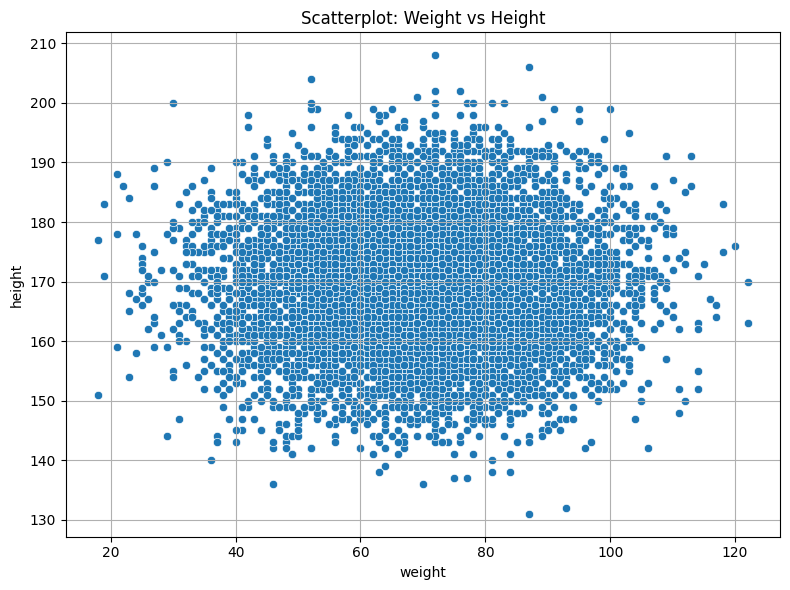

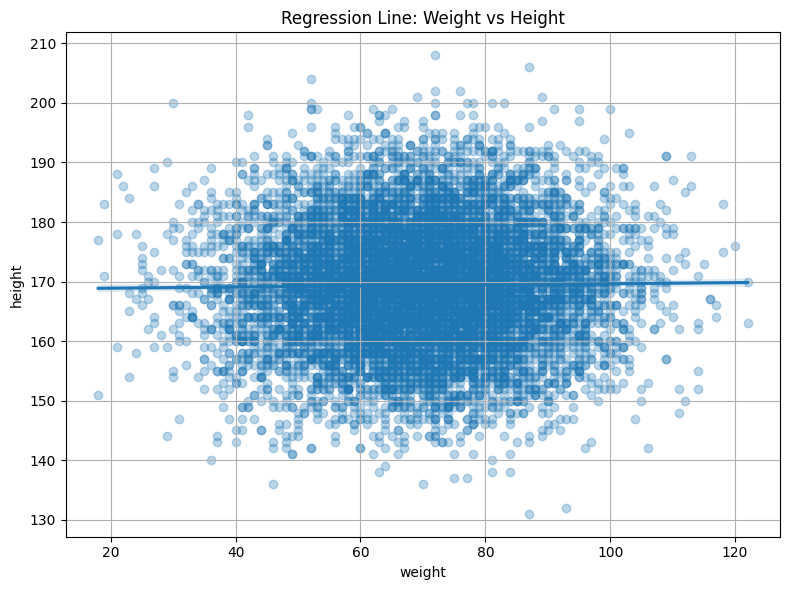

Correlation coefficient between weight and height: 0.01


In [11]:
if 'weight' in cancer_df.columns and 'height' in cancer_df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=cancer_df, x='weight', y='height')
    plt.title("Scatterplot: Weight vs Height")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.regplot(data=cancer_df, x='weight', y='height', scatter_kws={'alpha': 0.3})
    plt.title("Regression Line: Weight vs Height")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    correlation = cancer_df[['weight', 'height']].corr().iloc[0, 1]
    print(f"Correlation coefficient between weight and height: {correlation:.2f}")

## Histogram of Age by Gender

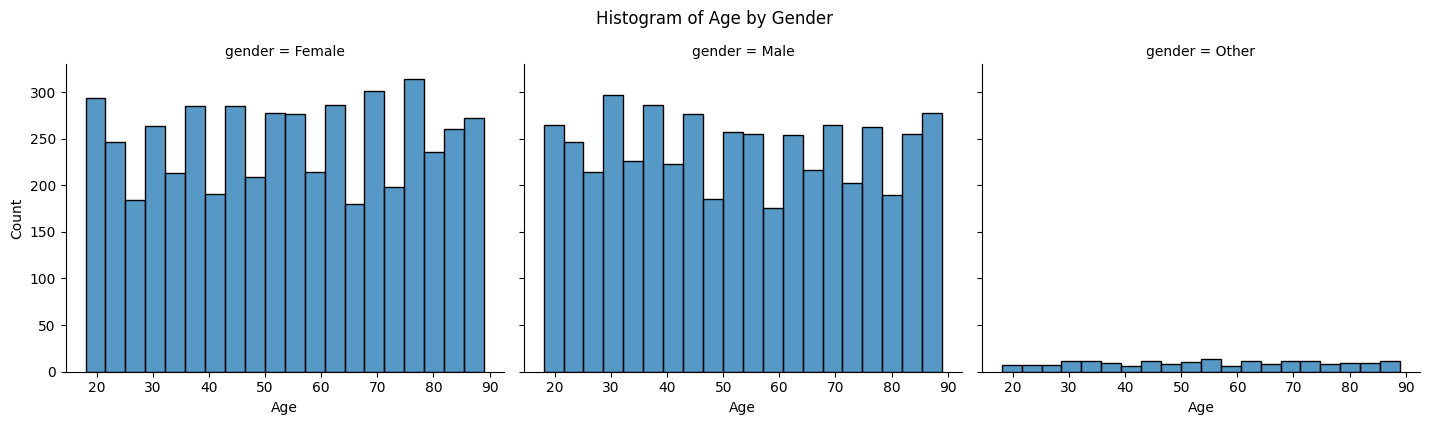

In [12]:
if 'gender' in cancer_df.columns and 'age' in cancer_df.columns:
    g = sns.FacetGrid(cancer_df, col='gender', height=4, aspect=1.2)
    g.map(sns.histplot, 'age', bins=20)
    g.set_axis_labels('Age', "Count")
    g.figure.suptitle("Histogram of Age by Gender", y=1.05)
    plt.show()

## Emirate-based Visualization

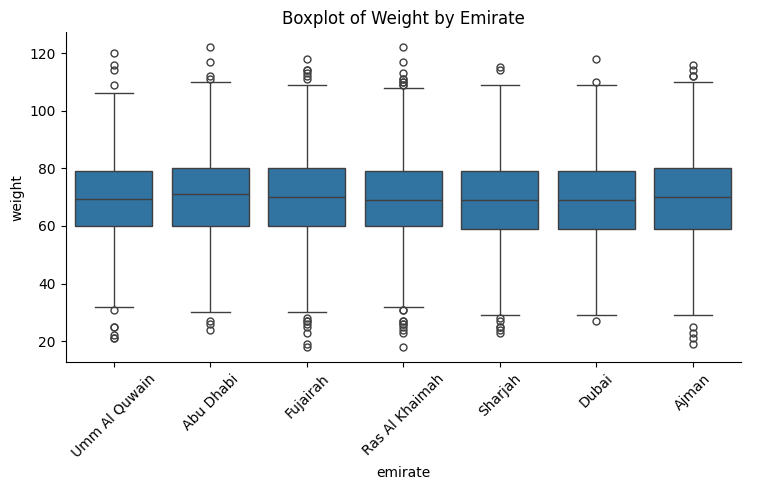

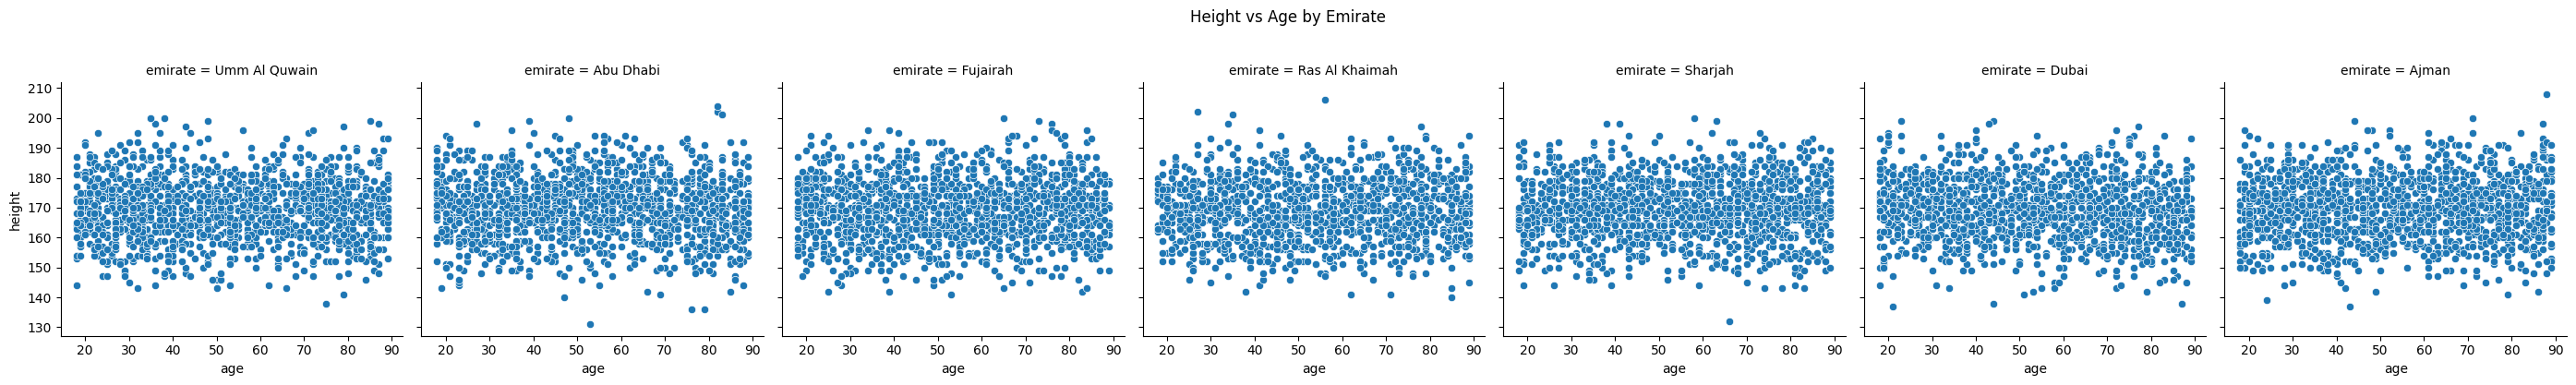

In [13]:
if 'emirate' in cancer_df.columns and 'weight' in cancer_df.columns:
    sns.catplot(data=cancer_df, x="emirate", y="weight", kind='box', height=5, aspect=1.5)
    plt.title("Boxplot of Weight by Emirate")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

if all(col in cancer_df.columns for col in ['emirate', 'age', 'height']):
    sns.relplot(data=cancer_df, x="age", y="height", col="emirate", kind='scatter', height=4, aspect=1)
    plt.suptitle("Height vs Age by Emirate", y=1.03)
    plt.tight_layout()
    plt.show()